In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# edges = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2)]
edges = [(0,0), (0,1), (1,0), (0, 3), (3, 0), (1, 3), (3, 1)]
G = nx.DiGraph(edges)
list(nx.simple_cycles(G))
type(edges)

list

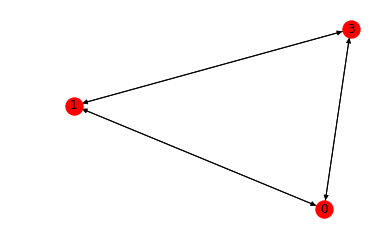

In [3]:
plt.subplot()
nx.draw(G, with_labels=True)

In [7]:
import scipy.io as sio

65

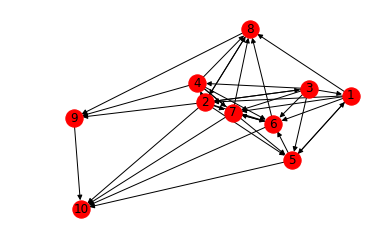

In [45]:
mat = sio.loadmat('/Users/harangju/Developer/i=5_2.mat', squeeze_me = True)
edges = mat['e']
weights = mat['w']
G = nx.DiGraph(edges.tolist())
plt.subplot()
nx.draw(G, with_labels=True)
cycle_gen = nx.simple_cycles(G)
cycles = list(cycle_gen)
len(cycles)
# cycles

In [9]:
cycle_count = np.zeros((11, 10))
for i in range(11):
    for j in range(10):
#         print(str(i+1) + ' ' + str(j+1))
        mat = sio.loadmat('/Users/harangju/Developer/i=' + str(i+1) + '_' + str(j+1) + '.mat', squeeze_me = True)
        edges = mat['e']
        weights = mat['w']
        G = nx.DiGraph(edges.tolist())
        cycle_gen = nx.simple_cycles(G)
        cycles = list(cycle_gen)
        cycle_count[i,j] = len(cycles)
        print(cycle_count[i,j])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
48.0
5.0
0.0
162.0
7.0
0.0
3.0
2.0
6.0
18.0
2.0
2.0
1.0
4.0
5.0
48.0
15.0
13.0
35.0
18.0
9.0
64.0
18.0
6.0
3.0
32.0
63.0
30.0
250.0
93.0
92.0
93.0
179.0
12.0
22.0
65.0
150.0
20.0
39.0
25.0
77.0
69.0
57.0
33.0
37.0
130.0
48.0
51.0
38.0
148.0
29.0
53.0
64.0
24.0
86.0
165.0
109.0
182.0
719.0
212.0
343.0
95.0
47.0
375.0
89.0
133.0
55.0
95.0
77.0
213.0
104.0
174.0
324.0
174.0
193.0
103.0
179.0
416.0
310.0
190.0
103.0
158.0
119.0
915.0
301.0
162.0
406.0
358.0
320.0
309.0
331.0
281.0
335.0
213.0
459.0
254.0


In [58]:
np.mean(cycle_count,1)
# np.std(cycle_count,1)

array([  0. ,  16.3,  32.2,  33.4,  80.7,  52.7,  86.9, 179.1, 202.7,
       294.9])

KeyboardInterrupt: 

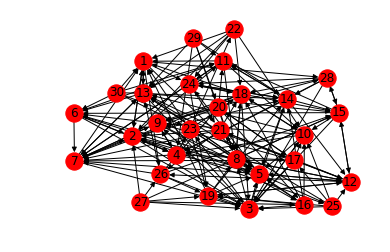

In [7]:
mat = sio.loadmat('/Users/harangju/Developer/matlab.mat', squeeze_me = True)
edges = mat['e']
weights = mat['w']
G = nx.DiGraph(edges.tolist())
plt.subplot()
nx.draw(G, with_labels=True)
cycle_gen = nx.simple_cycles(G)
cycles = list(cycle_gen)
len(cycles)

In [163]:
# find weights of cycles
cycle_weights = np.ones((len(cycles),1))
for i in range(0,len(cycles)):
    for j in range(0,len(cycles[i])-1):
        node1 = cycles[i][j]
        node2 = cycles[i][j+1]
        idx_edge = edges.tolist().index([node1, node2])
        cycle_weights[i] = cycle_weights[i] * weights[idx_edge]

In [168]:
# find expected duration of cycle
cycle_dur_exp = np.ones((len(cycles),1))
for i in range(0,len(cycles)):
    cycle_dur_exp[i] = len(cycles[i]) * cycle_weights[i]
# cycle_dur_exp